In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from PIL import Image

import warnings
warnings.filterwarnings("ignore")

# Getting familiar with the data

In [2]:
df_test = pd.read_csv('data/sign_mnist_test.csv')
df_train = pd.read_csv('data/sign_mnist_train.csv')

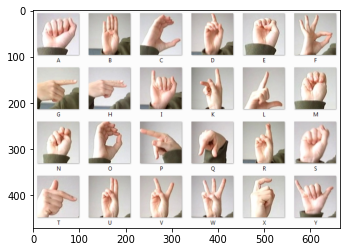

In [3]:
img_test = Image.open('data/amer_sign2.png')

plt.imshow(img_test)
plt.show()

In [4]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

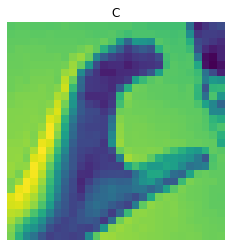

In [5]:
plt.imshow(df_train.values[2, 1:].reshape((28,28))) 

label_index = df_train["label"][2]

plt.title(f"{class_names[label_index]}")

plt.axis('off')
plt.show()

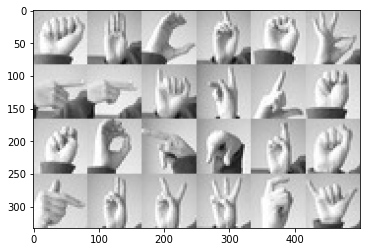

In [6]:
img_test = Image.open('data/amer_sign3.png')

plt.imshow(img_test)
plt.show()

In [7]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53


# Data preparation

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
df_train = np.array(df_train, dtype='float32')
df_test = np.array(df_test, dtype='float32')

In [35]:
X_train = df_train[:, 1:]
y_train = df_train[:, 0]

X_test = df_test[:, 1:]
y_test = df_test[:, 0]

In [11]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(27455, 784) (7172, 784)
(27455,) (7172,)


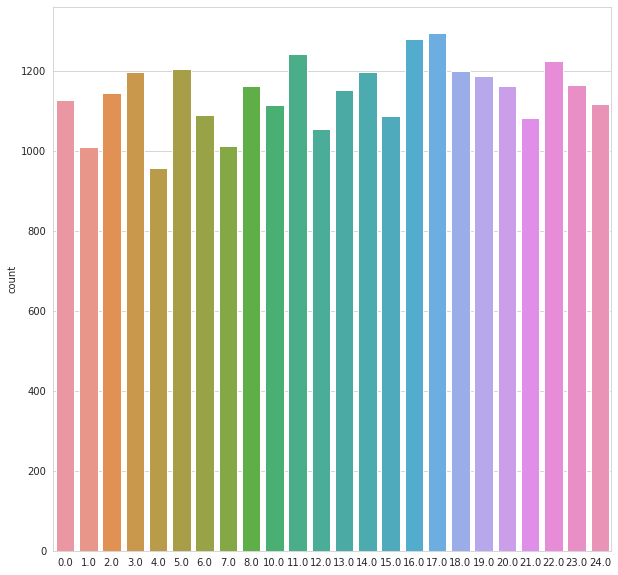

In [12]:
plt.figure(figsize = (10,10)) 

sns.set_style("whitegrid")
sns.countplot(y_train)

plt.show()

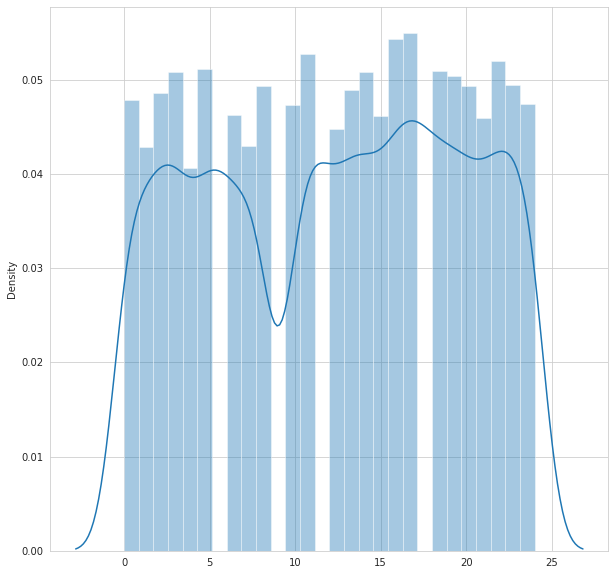

In [13]:
plt.figure(figsize = (10,10)) 

sns.set_style("whitegrid")
sns.distplot(y_train)

plt.show()

# Pipeline

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [15]:
kNN = KNeighborsClassifier(n_neighbors=5, p=2)
scaler = StandardScaler()

pipe = Pipeline([('scaler', scaler),
                 ('kNN', kNN)])

pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'kNN', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'kNN__algorithm', 'kNN__leaf_size', 'kNN__metric', 'kNN__metric_params', 'kNN__n_jobs', 'kNN__n_neighbors', 'kNN__p', 'kNN__weights'])

In [16]:
grid_params = {
    'kNN__n_neighbors' : [1,2,3,5],
    'kNN__p': [1, 2]
}

search = GridSearchCV(pipe, grid_params, n_jobs=10)

search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('kNN',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
        

In [17]:
print(f"Best score: {round(search.best_score_, 3)}")
print(f"Best params: {search.best_params_}")

Best score: 0.999
Best params: {'kNN__n_neighbors': 1, 'kNN__p': 2}


In [36]:
y_pred = search.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93       331
         1.0       0.95      0.92      0.93       432
         2.0       0.96      1.00      0.98       310
         3.0       0.82      0.93      0.87       245
         4.0       0.79      0.98      0.88       498
         5.0       0.99      0.95      0.97       247
         6.0       0.92      0.94      0.93       348
         7.0       0.98      0.97      0.98       436
         8.0       0.92      0.67      0.78       288
        10.0       0.88      0.60      0.71       331
        11.0       0.95      0.93      0.94       209
        12.0       0.79      0.58      0.67       394
        13.0       0.81      0.67      0.73       291
        14.0       1.00      0.93      0.96       246
        15.0       1.00      1.00      1.00       347
        16.0       0.89      1.00      0.94       164
        17.0       0.37      0.58      0.45       144
        18.0       0.68    

# CNN using TF

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report,confusion_matrix

___
### Data scaling and augmentation

In [22]:
test_df = pd.read_csv('data/sign_mnist_test.csv')
train_df = pd.read_csv('data/sign_mnist_train.csv')

In [23]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [24]:
X_train = train_df.values / 255
X_test = test_df.values / 255

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [25]:
label_binarizer = LabelBinarizer()

y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [26]:
datagen = ImageDataGenerator(
                featurewise_center=False, 
                samplewise_center=False,  
                featurewise_std_normalization=False,
                samplewise_std_normalization=False,
                zca_whitening=False,
                rotation_range=10,
                zoom_range = 0.1, 
                width_shift_range=0.1,  
                height_shift_range=0.1, 
                horizontal_flip=False,  
                vertical_flip=False
)

datagen.fit(X_train)

In [27]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1,
                                            factor=0.5, 
                                            min_lr=0.00001)

In [28]:
model = Sequential([
    Conv2D(125, (3, 3), input_shape = (28,28,1), strides = 1 , padding = 'same', activation='relu'),
    MaxPool2D(pool_size = (2, 2), strides = 2 , padding = 'same'),
    BatchNormalization(),
    
    Conv2D(75, (3, 3), strides = 2, padding = 'same', activation='relu'),
    MaxPool2D(pool_size = (2, 2), strides = 1, padding = 'same'),
    BatchNormalization(),
    
    Conv2D(25, (3, 3), strides = 2, padding = 'same', activation='relu'),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'),
    
    Flatten(),
    
    Dense(150, activation='relu'),
    Dropout(.2),
    Dense(24, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 125)       1250      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 125)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 125)       500       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 75)          84450     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 75)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 75)          300       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 25)          1

In [29]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(datagen.flow(X_train, y_train, batch_size = 128), epochs = 20, 
                    validation_data = (X_test, y_test),
                    callbacks = [learning_rate_reduction])

Epoch 1/20
215/215 [==============================] - 75s 344ms/step - loss: 2.3290 - accuracy: 0.3015 - val_loss: 8.0012 - val_accuracy: 0.0287
Epoch 2/20
215/215 [==============================] - 73s 341ms/step - loss: 0.6103 - accuracy: 0.7899 - val_loss: 7.4046 - val_accuracy: 0.0646
Epoch 3/20
215/215 [==============================] - 74s 342ms/step - loss: 0.3038 - accuracy: 0.8992 - val_loss: 2.6434 - val_accuracy: 0.3949
Epoch 4/20
215/215 [==============================] - 73s 341ms/step - loss: 0.1909 - accuracy: 0.9344 - val_loss: 0.1749 - val_accuracy: 0.9399
Epoch 5/20
215/215 [==============================] - 73s 341ms/step - loss: 0.1371 - accuracy: 0.9546 - val_loss: 0.2752 - val_accuracy: 0.9014
Epoch 6/20
215/215 [==============================] - 74s 342ms/step - loss: 0.1101 - accuracy: 0.9633 - val_loss: 0.2957 - val_accuracy: 0.9038

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 7/20
215/215 [=============================

In [30]:
print(f"Accuracy of the model is - {model.evaluate(X_test, y_test)[1]*100}")

225/225 [==============================] - 4s 19ms/step - loss: 0.0067 - accuracy: 0.9976
Accuracy of the model is - 99.76296424865723


___
### Visualizing and Evaluation

Text(0.5, 1.0, 'Accuracy')

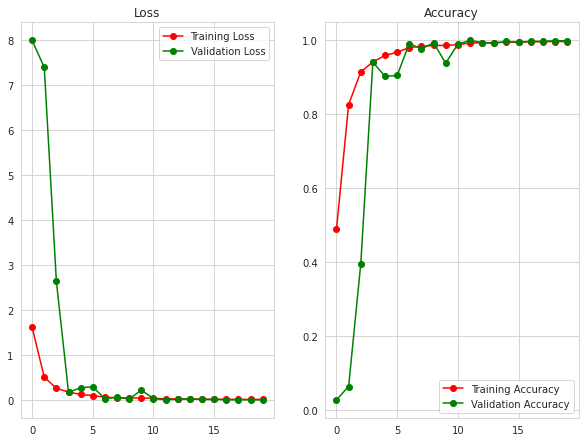

In [31]:
plt.figure(figsize=(10, 16))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], 'ro-', label='Training Loss')
plt.plot(history.history['val_loss'], 'go-', label='Validation Loss')

plt.legend()
plt.grid(True)

plt.title('Loss')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], 'ro-', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'go-', label='Validation Accuracy')

plt.legend()
plt.grid(True)

plt.title('Accuracy')

In [32]:
predictions = model.predict_classes(X_test)
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1
predictions[:5]        

array([ 6,  5, 10,  0,  3])